In [2]:
# 读取数据

import pandas as pd #数据分析
import numpy as np #科学计算
from pandas import Series,DataFrame
col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label","learners"]
data_1= pd.read_csv("E:\Pycharm\Intrusion_Detection\KDDTrain+.csv",  header=None,names = col_names)
data_1.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,learners
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [3]:
data_1.label.value_counts()

normal             13449
neptune             8282
ipsweep              710
satan                691
portsweep            587
smurf                529
nmap                 301
back                 196
teardrop             188
warezclient          181
pod                   38
guess_passwd          10
warezmaster            7
buffer_overflow        6
imap                   5
rootkit                4
multihop               2
phf                    2
loadmodule             1
ftp_write              1
land                   1
spy                    1
Name: label, dtype: int64

In [4]:
y_1=data_1['label'].copy()   #一维
##y的处理
u2r=["buffer_overflow","loadmodule","perl","rootkit"]
r2l=["ftp_write","imap","guess_passwd","phf","spy","multihop","warezmaster","warezclient"]
dos=["back","land","pod","smurf","teardrop",'neptune']
probe=["satan","portsweep","ipsweep","nmap"]
for i in u2r:
    y_1[y_1==i]="u2r"
for i in r2l:
    y_1[y_1==i]="r2l"
for i in dos:
    y_1[y_1==i]="dos"
for i in probe:
    y_1[y_1==i]="probe"
y_1[y_1=="normal."]="normal"
print(y_1.value_counts())

normal    13449
dos        9234
probe      2289
r2l         209
u2r          11
Name: label, dtype: int64


In [10]:
y_c=y_1.copy()  
y_c[y_1=='normal']='blue'
y_c[y_1=='probe']='red'
y_c[y_1=='dos']='yellow'
y_c[y_1=='u2r']='m'
y_c[y_1=='r2l']='green'
print(y_c.value_counts())

blue      13449
yellow     9234
red        2289
green       209
m            11
Name: label, dtype: int64


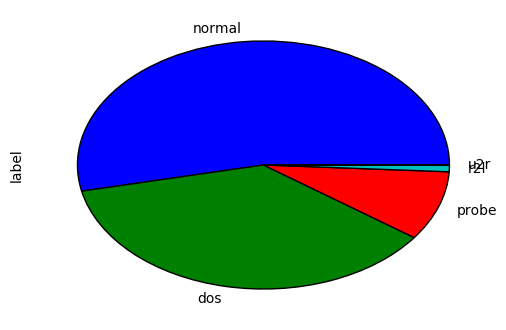

In [19]:
import matplotlib.pyplot as plt
y_1.value_counts().plot(kind='pie')
plt.show()

In [20]:
#去重
# import matplotlib.pyplot as plt
# IsDuplicated=data.duplicated()
#
# IsDuplicated.value_counts().plot(kind='bar')
# plt.show()
# data_1=data.drop_duplicates()

#one-hot
dummies_protocol = pd.get_dummies(data_1["protocol_type"], prefix='protocol')
dummies_flag = pd.get_dummies(data_1["flag"], prefix='flag')
# dummies_service = pd.get_dummies(data_1["service"], prefix='service')
# data_2 = pd.concat([data_1, dummies_protocol,dummies_flag,dummies_service], axis=1)
data_2 = pd.concat([data_1, dummies_protocol,dummies_flag], axis=1)
# data_2
#特征选择(by "A feature reduced intrusion detection system using ANN classifier",25个特征）
#建立X,y
feature_selection=["duration",
    "dst_bytes","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_access_files",
    "num_outbound_cmds","is_guest_login","rerror_rate","srv_diff_host_rate",
    "dst_host_count","dst_host_srv_count","dst_host_same_srv_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate",
    "protocol_icmp","protocol_tcp","protocol_udp",
    "flag_OTH","flag_REJ","flag_RSTO","flag_RSTOS0","flag_RSTR",
    "flag_S0","flag_S1","flag_S2","flag_S3","flag_SF","flag_SH"]
X_3=data_2[feature_selection]
y_3=data_2['label'].copy()   #一维

In [21]:
#baseline
#标准化
from sklearn.preprocessing import StandardScaler
scaler_base=StandardScaler().fit(X_3)
X=scaler_base.transform(X_3)  #X是ndarray

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_3,y_3,test_size=0.1,random_state=0)  #切分样本

from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2).fit_transform(X_test)
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(X_embedded[:,0],X_embedded[:,1],c=y_test,marker='o')
plt.show()

In [ ]:
#分类器
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.linear_model import LogisticRegression
##建立模型
# clf_1 = LogisticRegression(random_state=1)
clf_1 = RandomForestClassifier(n_estimators=100,oob_score=True)
#验证测试样本
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y_3,test_size=0.2,random_state=0)  #切分样本
clf_1.fit(X_train,y_train)
preditions_base=clf_1.predict(X_test)
#学习曲线
import numpy as np
from sklearn.model_selection import learning_curve
train_sizes,train_scores,test_scores=learning_curve(estimator=clf_1,
                                X=X_train,y=y_train,
                                train_sizes=np.linspace(0.05,1,10),
                                 cv=10, n_jobs=1,random_state=0)
train_mean=np.mean(train_scores,axis=1)
test_mean=np.mean(test_scores,axis=1)
train_std=np.std(train_scores,axis=1)
test_std=np.std(train_scores,axis=1)

In [ ]:
#混淆矩阵
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    import itertools
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    # plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
#混淆矩阵
from sklearn.metrics import confusion_matrix
cnf_matrix=confusion_matrix(y_test,preditions_base)
class_names=['dos','normal','probe','r2l','u2r']
plt.figure()
plot_confusion_matrix(cnf_matrix,classes=class_names,title=' Baseline Confusion matrix')
plt.figure()
#分类报告
from sklearn.metrics import classification_report
class_names=['dos','normal','probe','r2l','u2r']
print(" Baseline")
# print(clf_1.oob_score_)
print(classification_report(y_test,preditions_base,target_names=class_names,digits=6))

In [12]:
import scipy.io as sio  
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

mat1 = '4a.mat' #这是存放数据点的文件，需要它才可以画出来。上面有下载地址
data = sio.loadmat(mat1)
m = data['data']

x,y,z = m[0],m[1],m[2]
ax=plt.subplot(111,projection='3d') #创建一个三维的绘图工程

#将数据点分成三部分画，在颜色上有区分度
ax.scatter(x[:1000],y[:1000],z[:1000],c='y') #绘制数据点
ax.scatter(x[1000:4000],y[1000:4000],z[1000:4000],c='r')
ax.scatter(x[4000:],y[4000:],z[4000:],c='g')

ax.set_zlabel('Z') #坐标轴
ax.set_ylabel('Y')
ax.set_xlabel('X')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '4a.mat'